# Data EDA

In [1]:
import pandas as pd
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2

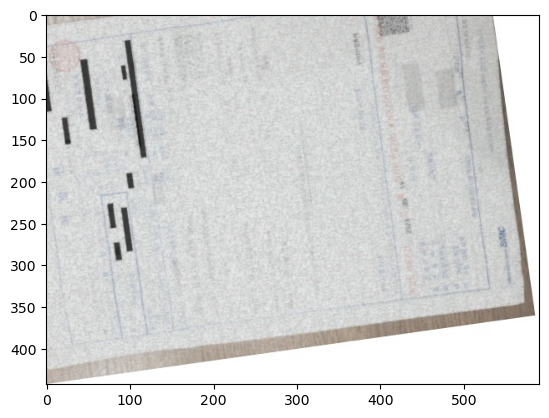

In [14]:
img = cv2.imread(os.path.join('/Users/kimhongseok/upstage_AI_Lab/CV_대회/data/test', '00471f8038d9c4b6.jpg'))
plt.imshow(img)

In [2]:
classes_df = pd.read_csv('./data/meta.csv',)
classes_df

,target,class_name
0,0,account_number
1,1,application_for_payment_of_pregnancy_medical_e...
2,2,car_dashboard
3,3,confirmation_of_admission_and_discharge
4,4,diagnosis
5,5,driver_lisence
6,6,medical_bill_receipts
7,7,medical_outpatient_certificate
8,8,national_id_card
9,9,passport


In [3]:
train_df = pd.read_csv('./data/train.csv')

In [4]:
train_df

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16
...,...,...
1565,fed9e9ec4a77bc06.jpg,4
1566,feeade617aa68c45.jpg,7
1567,ff51dd281a8423f1.jpg,11
1568,ff8a6a251ce51c95.jpg,5


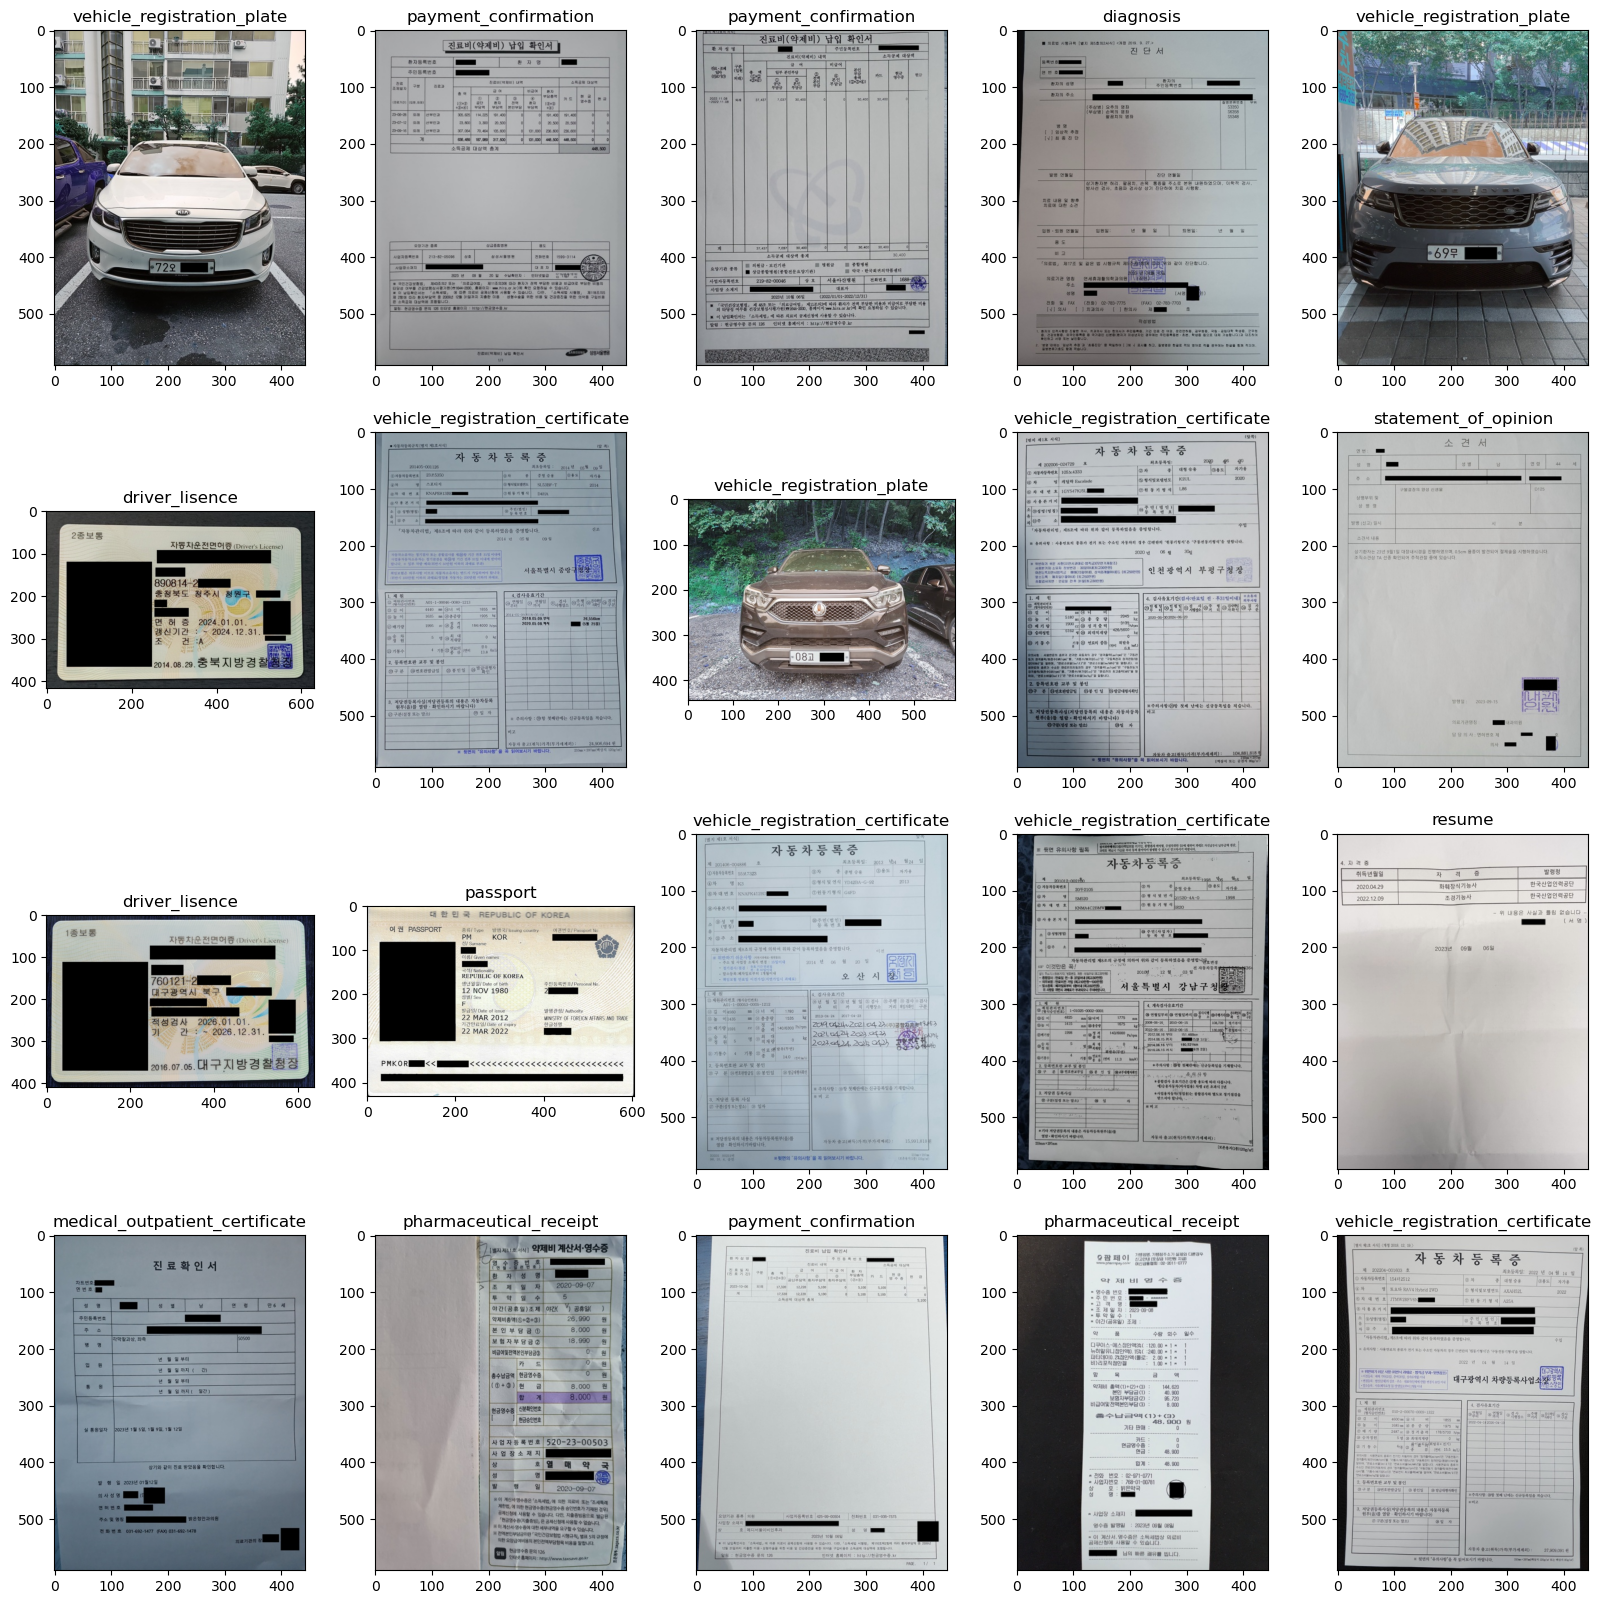

In [5]:
plt.figure(figsize=(20, 20))

for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    ID = train_df.iloc[i]['ID']
    target = train_df.iloc[i]['target']
    class_name = classes_df.iloc[target]['class_name']
    img = Image.open(f'./data/train/{ID}')

    plt.imshow(img)
    plt.title(class_name)

# 데이터 분할
- 클래스에따라 각각의 폴더에 따로 저장

In [10]:
l = train_df.shape[0]
root_path = '/Users/kimhongseok/upstage_AI_Lab/CV_대회/data/train'
save_root_path = '/Users/kimhongseok/upstage_AI_Lab/CV_대회/splited_data'

for i in range(l):
    img = cv2.imread(os.path.join(root_path, train_df.iloc[i, 0]))
    target_path = os.path.join(save_root_path, f'{train_df.iloc[i, 1]}')
    cv2.imwrite(os.path.join(target_path, train_df.iloc[i, 0]), img)

In [11]:
target_img_cnt = [0 for _ in range(17)]

for i in range(17):
    cnt = len(os.listdir(os.path.join(save_root_path, f'{i}')))
    target_img_cnt[i] = cnt

In [12]:
target_img_cnt

[100,
 46,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 74,
 50,
 100,
 100]

<BarContainer object of 17 artists>

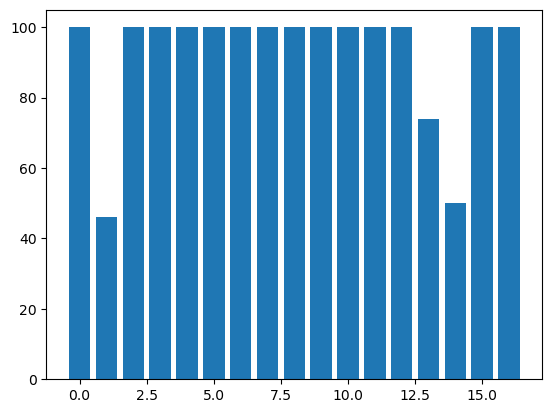

In [16]:
x = list(i for i in range(17))
plt.bar(x, target_img_cnt)

In [19]:
train_df.groupby('target').count()

,ID
target,
0,100
1,46
2,100
3,100
4,100
5,100
6,100
7,100
8,100


In [ ]:
46+74+50